age: Age in years<br>
sex: Sex (1 = Male, 0 = Female)<br>
cp: Chest Pain Type (0-4)<br>
<tr>        0, Typical angina<br>
<tr>             Chest pain related decrease blood supply to the heart<br>
<tr>         1, Atypical angina<br>
    <tr>         Chest pain not related to heart<br>
<tr>         2, Non-anginal pain<br>
<tr>             Typically esophageal spasms (non heart related)<br>
<tr>         3, Asymptomatic<br>
<tr>             Chest pain not showing signs of disease<br>
trestbps: Resting blood pressure upon admission (mm Hg)<br>
<tr>         Anything above 130-140 is typically cause for concern<br>
chol: Serum cholestrol level (mg/dL)<br>
     <tr>    serum = LDL + HDL + .2 * triglycerides<br>
<tr>         Above 200 is cause for concern<br>
fbs: Fasting blood sugar > 120 mg/dL (1 = True, 0 = False)<br>
     <tr>    fbs > 126 mg/dL signals diabetes<br>
restecg: Resting electrocardiographic results (0 - 2)<br>
        <tr> 0, Nothing to note<br>
        <tr> 1, ST-T Wave abnormality<br>
            <tr> Can range from mild symptoms to severe problems<br>
            Signals non-normal heart beat<br>
       2, Possible or definite Left ventricular hypertrophy<br>
       <tr>      Enlarged heart's main pumping chamber<br>
thalach: Maximum heart rate achieved<br>
       <tr>  Rate above 100 is cause for concern<br>
exang: exercise induced angina (1 = yes; 0 = no)<br>
oldpeak: ST depression induced by exercise relative to rest<br>
       <tr>  Looks at stress of heart during excercise<br>
        <tr> Unhealthy heart will stress more<br>
slope: the slope of the peak exercise ST segment<br>
        <tr> 0, upsloping<br>
            <tr> <tr> Better heart rate with excercise (uncommon)<br>
        <tr> 1, flatsloping<br>
            <tr> <tr> Minimal change (typical healthy heart)<br>
        <tr> 2, downsloping<br>
            <tr> <tr> Signs of unhealthy heart<br>
ca: number of major vessels (0-3) colored by flourosopy<br>
        <tr> Colored vessel means the doctor can see the blood passing through<br>
            <tr> Move blood movement the better (no clots)<br>
thal: Thalium stress test result<br>
        <tr> Sees how blood moves through your heart while excercising<br>
        <tr> <tr> 1, Normal<br>
        <tr> <tr> 6, fixed defect<br>
            Used to be defect but now okay<br>
        <tr> 7, reversable defect<br>
            Not proper blood movement when excercising<br>
target: Heart Disease (1 = True, 0 = False)<br>



Obtenemos los datos del dataset y mostramos algunos de los datos

In [1]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
##import seaborn as sns
##sns.set_style('whitegrid')
%matplotlib inline
data= pd.read_csv('Admission_Predict.csv')

In [2]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


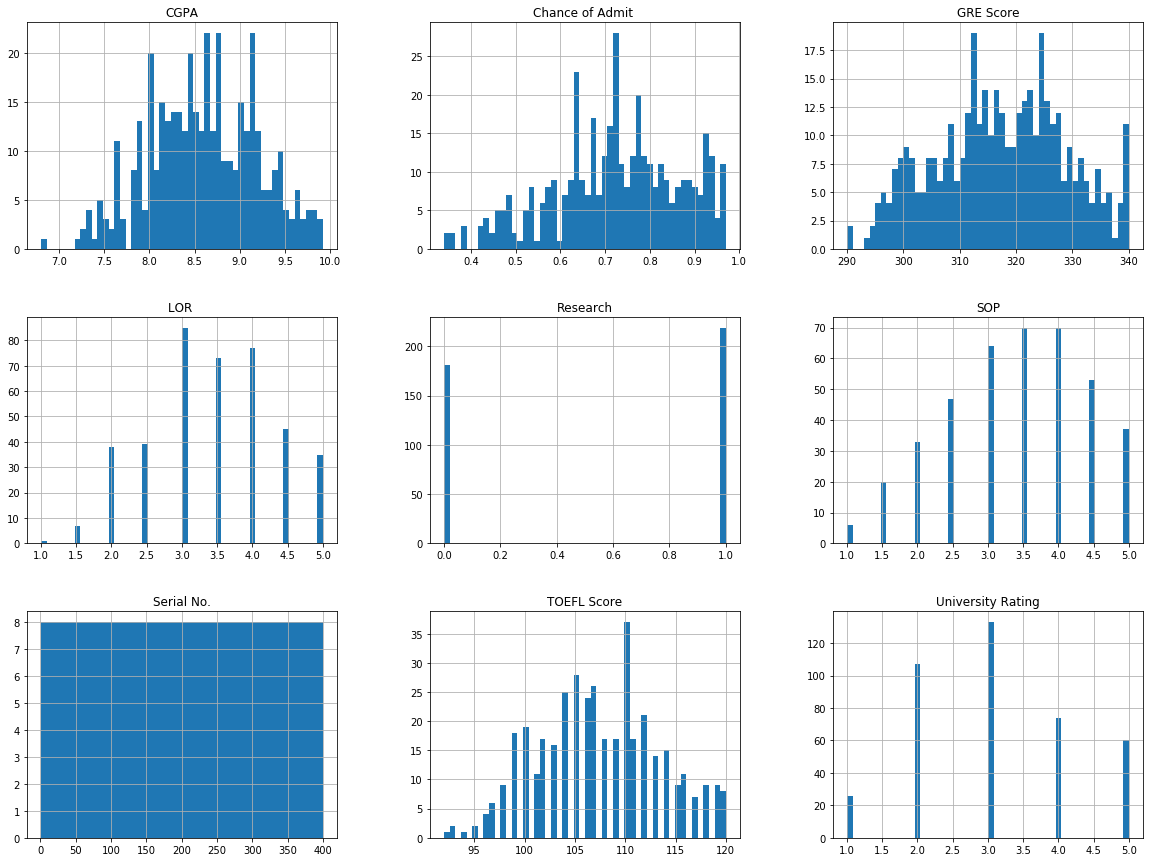

In [4]:


%matplotlib inline
import matplotlib.pyplot as plt

# show the histogram of instances.
data.hist(bins=50, figsize=(20, 15))
plt.show()



In [5]:
import numpy as np

# function for spliting the data
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

320 train + 80 test


In [7]:
from zlib import crc32


def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
data_with_id = data.reset_index()   # adds an 'index' column
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
209,210,301,104,3,3.5,4.0,8.12,1,0.68
280,281,311,102,3,4.5,4.0,8.64,1,0.68
33,34,340,114,5,4.0,4.0,9.60,1,0.90
210,211,325,108,4,4.5,4.0,9.06,1,0.79
93,94,301,97,2,3.0,3.0,7.88,1,0.44


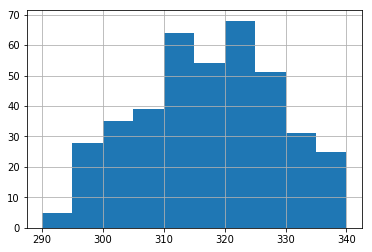

In [10]:
data["GRE Score"].hist()

In [11]:
 # Divide by 1.5 to limit the number of income categories
data["GRE Score2"] = np.ceil(data["GRE Score"] / 10)
# Label those above 5 as 5
data["GRE Score2"].where(data["GRE Score2"] < 34, 34, inplace=True)



In [12]:
data["GRE Score2"].value_counts()

32.0    122
33.0    113
31.0     73
34.0     50
30.0     40
29.0      2
Name: GRE Score2, dtype: int64

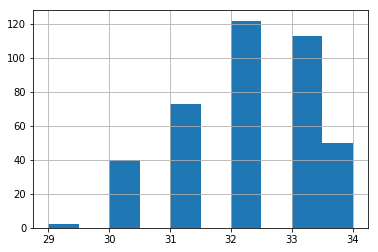

In [13]:
data["GRE Score2"].hist()

In [14]:
##### now use this code to do a stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index, in split.split(data, data["GRE Score2"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]



In [15]:
strat_test_set["GRE Score2"].value_counts() / len(strat_test_set)



32.0    0.3000
33.0    0.2875
31.0    0.1875
34.0    0.1250
30.0    0.1000
Name: GRE Score2, dtype: float64

In [16]:
data["GRE Score2"].value_counts() / len(data)

32.0    0.3050
33.0    0.2825
31.0    0.1825
34.0    0.1250
30.0    0.1000
29.0    0.0050
Name: GRE Score2, dtype: float64

In [17]:
import pandas as pd

# compare the income category proportions in the overall dataset.

def income_cat_proportions(data):
    return data["GRE Score2"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [18]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
29.0,0.0050,NaN,NaN,NaN,NaN
30.0,0.1000,0.1000,0.1125,12.500000,0.000000
31.0,0.1825,0.1875,0.2000,9.589041,2.739726
32.0,0.3050,0.3000,0.2750,-9.836066,-1.639344
33.0,0.2825,0.2875,0.2875,1.769912,1.769912
34.0,0.1250,0.1250,0.1250,0.000000,0.000000


In [19]:
# remove the income_cat attribute. The data is back to its original state.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("GRE Score2", axis=1, inplace=True)

In [20]:
data = strat_train_set.copy()  # make a copy of the data.

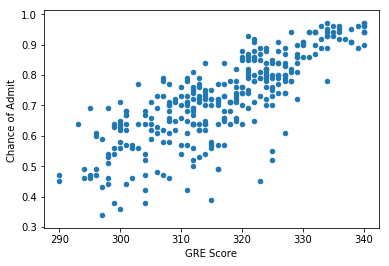

In [21]:
data.plot(kind="scatter", x="GRE Score", y="Chance of Admit ")
plt.show()

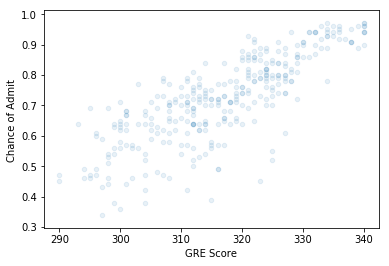

In [22]:
data.plot(kind="scatter", x="GRE Score", y="Chance of Admit ", alpha=0.1)
plt.show()

In [23]:
corr_matrix = data.corr()

In [24]:
corr_matrix["GRE Score"].sort_values(ascending=False)

GRE Score            1.000000
TOEFL Score          0.836768
CGPA                 0.826449
Chance of Admit      0.800187
University Rating    0.666838
SOP                  0.612531
Research             0.574467
LOR                  0.571979
Serial No.          -0.125128
Name: GRE Score, dtype: float64

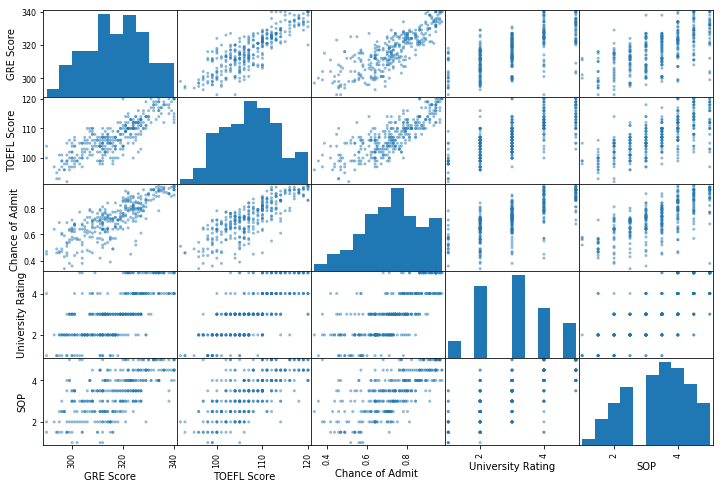

In [25]:
# check correlations between attributes using Pandas' *scatter_matrix*.
from pandas.plotting import scatter_matrix

attributes = ["GRE Score", "TOEFL Score", "Chance of Admit ", "University Rating","SOP"] #only promising attributes.
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()



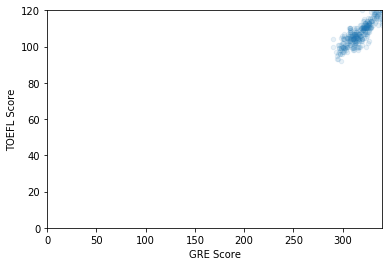

In [26]:
# The most promising attribute to predict the median house value is the median income.
data.plot(kind="scatter", x="GRE Score", y="TOEFL Score", alpha=0.1)
plt.axis([0, 340, 0, 120])
plt.show()


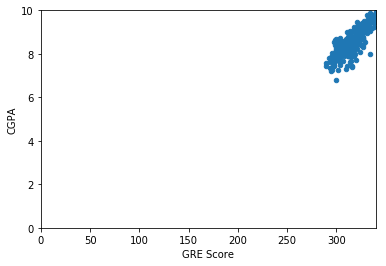

In [27]:
# The most promising attribute to predict the median house value is the median income.
data.plot(kind="scatter", x="GRE Score", y="CGPA")
plt.axis([0, 340, 0, 10])
plt.show()


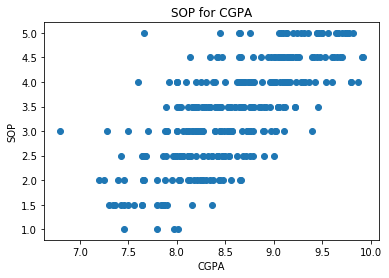

In [28]:
plt.scatter(data["CGPA"],data.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

In [29]:
data.describe()#no tomar en cuenta Serial No. se tendra que borrar despues porque no nos sirve, hay que buscar como borrarlo

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,201.362500,316.775000,107.315625,3.050000,3.370312,3.445312,8.582937,0.543750,0.722906
std,117.128817,11.640352,6.093607,1.129818,1.016121,0.911083,0.606261,0.498862,0.141853
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.340000
25%,97.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.157500,0.000000,0.640000
50%,201.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.565000,1.000000,0.730000
75%,303.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.042500,1.000000,0.822500
max,399.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Para la parte del limpiado de los datos, hay que mencionar que en este dataset, no hay valores nulos en ningun campo, pero lo que si hay, esque existe un campo que es llamado "Serial No." el cual no nos sirve puesto que solo es un tipo de index para mantener orden en los datos, por lo que se quitara del dataset.

In [30]:
#Preparamos los datos para empezar a trabajar
df = pd.read_csv("Admission_Predict.csv",sep = ",")
serialNo = df["Serial No."].values#Guardamos los valores en otra locacion porque los quitaremos del dataset

In [31]:
df.drop(["Serial No."],axis=1,inplace = True)#Quitamos valores que no sirven

In [32]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})#Corregimos un peque;o error que hay en el dataset

In [33]:
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [34]:
# necesitamos normalizar los datos de 0 a 1 segun el paper leido, par apoder trabajar los datos.
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/josephjoestar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/josephjoestar/.local/lib/pytho

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
print("Predictions:", lin_reg.predict(x_test))

Predictions: [0.65117446 0.72368741 0.93536809 0.82164316 0.58158673 0.92863016
 0.52682366 0.54308993 0.65940583 0.83834924 0.72008833 0.90749769
 0.55354476 0.89008648 0.70389539 0.68664473 0.66657268 0.48196096
 0.69057217 0.97493132 0.58802433 0.65286881 0.71150098 0.53528647
 0.94677007 0.80982947 0.69459383 0.56495613 0.68192423 0.81039878
 0.80796481 0.94640983 0.64599494 0.51104918 0.65983663 0.66907811
 0.71572271 0.64556878 0.61540702 0.87367833 0.74275261 0.59782649
 0.77456683 0.95944897 0.85124125 0.83554825 0.94662422 0.64822919
 0.92247594 0.85906183 0.89624998 0.72869743 0.78874783 0.95142703
 0.57325803 0.58744723 0.68621316 0.84544646 0.60495144 0.84808919
 0.66642894 0.65524969 0.70024808 0.51206905 0.62930376 0.7173701
 0.62200838 0.84170334 0.85675802 0.79886217 0.72196478 0.81448203
 0.87373609 0.83332085 0.52554247 0.72181818 0.6896438  0.59442609
 0.87840579 0.75779333]


In [45]:
print("Expected:", y_test, "\n", "Obtained", lin_reg.predict(x_test)) #Hacemos la comparacion de los resultados obtenidos del modelo

Expected: [0.68 0.68 0.9  0.79 0.44 0.94 0.43 0.36 0.72 0.85 0.45 0.93 0.64 0.93
 0.71 0.53 0.66 0.34 0.74 0.96 0.64 0.54 0.71 0.54 0.92 0.84 0.59 0.61
 0.7  0.74 0.82 0.94 0.71 0.46 0.69 0.56 0.72 0.58 0.61 0.9  0.73 0.64
 0.74 0.94 0.92 0.82 0.96 0.71 0.94 0.89 0.86 0.73 0.81 0.94 0.39 0.48
 0.71 0.86 0.65 0.86 0.57 0.61 0.79 0.44 0.64 0.74 0.64 0.83 0.89 0.84
 0.75 0.84 0.9  0.88 0.49 0.72 0.64 0.67 0.9  0.79] 
 Obtained [0.65117446 0.72368741 0.93536809 0.82164316 0.58158673 0.92863016
 0.52682366 0.54308993 0.65940583 0.83834924 0.72008833 0.90749769
 0.55354476 0.89008648 0.70389539 0.68664473 0.66657268 0.48196096
 0.69057217 0.97493132 0.58802433 0.65286881 0.71150098 0.53528647
 0.94677007 0.80982947 0.69459383 0.56495613 0.68192423 0.81039878
 0.80796481 0.94640983 0.64599494 0.51104918 0.65983663 0.66907811
 0.71572271 0.64556878 0.61540702 0.87367833 0.74275261 0.59782649
 0.77456683 0.95944897 0.85124125 0.83554825 0.94662422 0.64822919
 0.92247594 0.85906183 0.89624998 0.

In [46]:
from sklearn.metrics import mean_squared_error


data_predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.06794853476922819

In [47]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [50]:
##x_train, y_train
data_predictions = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.09194597598590164

In [51]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


display_scores(tree_rmse_scores)

Scores: [0.08274585 0.09082951 0.10703387 0.09229707 0.08900492 0.09084671
 0.08861786 0.07875992 0.12768369 0.05894913]
Mean: 0.09067685326433837
Standard deviation: 0.01690660468803969


In [53]:
lin_scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.0677302  0.05168768 0.09130983 0.05913061 0.05718555 0.06869804
 0.06399613 0.06664158 0.05470827 0.04925081]
Mean: 0.06303387114361021
Standard deviation: 0.01142397528514687


In [54]:
from sklearn.ensemble import RandomForestRegressor


forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [55]:
data_predictions = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.027182542651488662

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.08183444 0.08785642 0.10644834 0.0883353  0.0875     0.0889698
 0.08852966 0.0769131  0.12463697 0.06349213]
Mean: 0.08945161494214018
Standard deviation: 0.015571483045718048


In [58]:
lin_scores = cross_val_score(lin_reg, x_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)



Scores: [0.0677302  0.05168768 0.09130983 0.05913061 0.05718555 0.06869804
 0.06399613 0.06664158 0.05470827 0.04925081]
Mean: 0.06303387114361021
Standard deviation: 0.01142397528514687


In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [60]:
housing_predictions = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.027182542651488662

In [61]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, x_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.06786314 0.06879112 0.1003469  0.07076877 0.05225628 0.06782077
 0.0688236  0.06660987 0.07081644 0.06854583]
Mean: 0.07026427265340826
Standard deviation: 0.011234327460400333


In [62]:
scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.063034
std       0.012042
min       0.049251
25%       0.055328
50%       0.061563
75%       0.067458
max       0.091310
dtype: float64

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10], 'max_features': [2, 4, 6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10], 'max_features': [2, 4, 6]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [65]:
# The best hyperparameter combination
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [66]:
# the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.08033566732432391 {'max_features': 2, 'n_estimators': 3}
0.07323485338279855 {'max_features': 2, 'n_estimators': 10}
0.07879363870262625 {'max_features': 4, 'n_estimators': 3}
0.07201920316832172 {'max_features': 4, 'n_estimators': 10}
0.08201795196445985 {'max_features': 6, 'n_estimators': 3}
0.07491691230957132 {'max_features': 6, 'n_estimators': 10}
0.07570777150773007 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.0678413590665753 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.0796422120765392 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.0725288089313481 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.07824152421260153 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.0732968280350521 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7854a7f358>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f78405454e0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [69]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.07078222979522442 {'max_features': 7, 'n_estimators': 180}
0.07129622282343497 {'max_features': 5, 'n_estimators': 15}
0.06775194642379628 {'max_features': 3, 'n_estimators': 72}
0.07024098057027622 {'max_features': 5, 'n_estimators': 21}
0.07085090071899458 {'max_features': 7, 'n_estimators': 122}
0.0676055249221541 {'max_features': 3, 'n_estimators': 75}
0.0677384042674952 {'max_features': 3, 'n_estimators': 88}
0.06861812306162272 {'max_features': 5, 'n_estimators': 100}
0.0668154450291581 {'max_features': 3, 'n_estimators': 150}
0.08776344270252849 {'max_features': 5, 'n_estimators': 2}


In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.24998458, 0.16844065, 0.08774207, 0.07779157, 0.09863706,
       0.3009441 , 0.01645995])

In [71]:
final_model = grid_search.best_estimator_
##x_train, x_test,y_train, y_test

X_test_prepared = x_test
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.07302559482811488

Parte para linear regression

In [72]:
# reading the dataset
df = pd.read_csv("Admission_Predict.csv",sep = ",")

# it may be needed in the future.
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [73]:
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [81]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/josephjoestar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/josephjoestar/.local/lib/pytho

In [82]:
X_train_01_subset = x_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]


In [83]:
print(y_train_01_subset)

[]


In [84]:
from plot_regions import plot_decision_regions
from logistic_regression_gd import LogisticRegressionGD

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(x=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

TypeError: unhashable type: 'slice'